In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('data/train.csv')

In [3416]:
# исправим название колонки Helthcare_2
cols = data.columns
for i in cols:
    if i == 'Helthcare_2':
        data = data.rename(columns={'Helthcare_2':'Healthcare_2'})

In [3417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Healthcare_2     10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [3418]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Train_test_split

In [3419]:
train, valid = train_test_split(data, test_size=0.30, random_state=42)

In [3420]:
train.shape, valid.shape

((7000, 20), (3000, 20))

### Prepare train, valid

In [3421]:
def data_NaN(df_input):
    df_output = df_input.copy()
    df_output = df_output.fillna(0)
    return df_output

In [3422]:
def clean_rooms(df_input):
    df_output = df_input.copy()
    
    idx = (df_output['Square'] < 25) & (df_output['Rooms'] == 0)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 1

    idx = (df_output['Square'] < 45) & (df_output['Rooms'] == 0)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 2
    
    idx = (df_output['Square'] < 100) & (df_output['Rooms'] == 0)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 3
    
    idx = (df_output['Square'] < 150) & (df_output['Rooms'] == 0)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 5
    
    df_output.loc[df_output['Rooms'] == 0, 'Rooms'] = 6
    
    idx = (df_output['Square'] < 150) & (df_output['Rooms'] > 6)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 5
    
    idx = (df_output['Square'] < 100) & (df_output['Rooms'] > 4)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 3
    
    idx = (df_output['Square'] < 45) & (df_output['Rooms'] > 3)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 2 
    
    idx = (df_output['Square'] < 25) & (df_output['Rooms'] > 2)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 1
    
    idx = (df_output['Square'] > 150) & (df_output['Rooms'] < 6)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 6
    
    idx = (df_output['Square'] > 100) & (df_output['Rooms'] < 4)
    df_output.loc[idx, 'Rooms'] = df_output.loc[idx, 'Rooms'] = 3

    return df_output

In [3423]:
def clean_other(df_input):
    
    df_output = df_input.copy()
    
    idx = (df_output['LifeSquare'] < 15)
    df_output.loc[idx, 'LifeSquare'] = df_output.loc[idx, 'LifeSquare'] = 15
    
    idx = (df_output['LifeSquare'] > df_output['Square'])
    df_output.loc[idx, 'LifeSquare'] = df_output.loc[idx, 'Square']
    
    Square = dict(df_output.groupby('Rooms')['Square'].median())
    idx = (df_output['Square'] < 15) & (df_output['Rooms'] < 2)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    idx = (df_output['Square'] < 30) & (df_output['Rooms'] > 1)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    idx = (df_output['Square'] < 30) & (df_output['Rooms'] > 1)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    LifeSquare = dict(df_output.groupby('Rooms')['LifeSquare'].median())
    idx = (df_output['LifeSquare'] < 15)
    df_output.loc[idx, 'LifeSquare'] = df_output.loc[idx, 'Rooms'].apply(lambda x: LifeSquare[x])

    idx = (df_output['KitchenSquare'] == 0)
    df_output.loc[idx, 'KitchenSquare'] = df_output.loc[idx, 'KitchenSquare'] = 6
    
    KitchenSquare = dict(df_output.groupby('Rooms')['KitchenSquare'].median())
    idx = (df_output['Rooms'] > 0)
    df_output.loc[idx, 'KitchenSquare'] = df_output.loc[idx, 'Rooms'].apply(lambda x: KitchenSquare[x])
    
    idx = (df_output['HouseFloor'] < df_output['Floor'])
    df_output.loc[idx, 'HouseFloor'] = df_output.loc[idx, 'Floor']
    
    idx = (df_output['HouseYear'] >= 2019)
    df_output.loc[idx, 'HouseYear'] = 2019
   
    # заменяем NaN в колонке Healthcare_1 на 0
    df_output['Healthcare_1'].fillna(df_output['Healthcare_1'].median(), inplace=True)
    
    df_output['Ecology_2'] = df_output['Ecology_2'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Ecology_3'] = df_output['Ecology_3'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Shops_2'] = df_output['Shops_2'].apply(lambda x: 1 if x == 'A' else 0)
    
    return df_output

In [3424]:
def add_distr_info(df_input):
    df_output = df_input.copy()
    distr_info = train['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'flat_qty_distr'})
    df_output = pd.merge(df_output, distr_info, on='DistrictId', how='left')
    df_output['flat_qty_distr'] = df_output['flat_qty_distr'].fillna(0.000143) 
    return df_output

In [3425]:
def add_mean_price(df_input):
    df_output = df_input.copy()
    
    distr_stat_dr = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_dr'})
    distr_stat_r = train.groupby(['Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_r'})
    distr_stat_s = train.groupby(['Square'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_s'})
    mean_price = train['Price'].mean()
    
    df_output = pd.merge(df_output, distr_stat_dr, on=['DistrictId', 'Rooms'], how='left')
    df_output = pd.merge(df_output, distr_stat_r, on='Rooms', how='left')
    df_output = pd.merge(df_output, distr_stat_s, on='Square', how='left')
    df_output['mean_price_r'] = df_output['mean_price_r'].fillna(mean_price)
    df_output['mean_price_s'] = df_output['mean_price_s'].fillna(df_output['mean_price_r'])
    df_output['mean_price_dr'] = df_output['mean_price_dr'].fillna(df_output['mean_price_r'])
    
    return df_output

In [3426]:
def prepare_data(data):
    data = data_NaN(data)
    data = clean_rooms(data)
    data = clean_other(data)
    data = add_distr_info(data)
    data = add_mean_price(data)
    return data    

In [3427]:
train = prepare_data(train)

In [3428]:
valid = prepare_data(valid)

In [3429]:
train.shape, valid.shape

((7000, 24), (3000, 24))

In [3430]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 24 columns):
Id                3000 non-null int64
DistrictId        3000 non-null int64
Rooms             3000 non-null float64
Square            3000 non-null float64
LifeSquare        3000 non-null float64
KitchenSquare     3000 non-null float64
Floor             3000 non-null int64
HouseFloor        3000 non-null float64
HouseYear         3000 non-null int64
Ecology_1         3000 non-null float64
Ecology_2         3000 non-null int64
Ecology_3         3000 non-null int64
Social_1          3000 non-null int64
Social_2          3000 non-null int64
Social_3          3000 non-null int64
Healthcare_1      3000 non-null float64
Healthcare_2      3000 non-null int64
Shops_1           3000 non-null int64
Shops_2           3000 non-null int64
Price             3000 non-null float64
flat_qty_distr    3000 non-null float64
mean_price_dr     3000 non-null float64
mean_price_r      3000 non-null float

In [3431]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price,flat_qty_distr,mean_price_dr,mean_price_r,mean_price_s
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8377.215000,50.027333,1.903333,56.402380,32.031150,6.275333,8.539333,13.338667,1984.740333,0.121232,0.01100,0.024333,24.499000,5323.531333,8.026667,605.270667,1.334333,4.163000,0.080333,213414.800753,0.024354,212385.405482,214725.522273,214725.522273
std,4847.850029,43.224970,0.840372,22.196839,20.984807,0.543713,5.286313,5.949603,18.647309,0.119999,0.10432,0.154108,17.413857,3995.703779,23.746703,942.648473,1.505980,4.762561,0.271854,92761.108274,0.026806,72822.346029,54620.738996,54620.738996
min,2.000000,0.000000,1.000000,16.547242,15.000000,6.000000,1.000000,1.000000,1910.000000,0.000000,0.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59877.592523,0.000143,98177.346712,159070.589178,159070.589178
25%,4153.750000,21.000000,1.000000,41.855890,17.547126,6.000000,4.000000,9.000000,1973.000000,0.019509,0.00000,0.000000,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,0.000000,151954.236807,0.005714,165375.032606,159070.589178,159070.589178
50%,8390.500000,34.000000,2.000000,52.149577,29.293029,6.000000,7.000000,14.000000,1977.000000,0.075779,0.00000,0.000000,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,0.000000,192054.173699,0.010429,196547.528450,214823.938545,214823.938545
75%,12656.250000,74.000000,2.000000,65.761977,41.245052,6.000000,12.000000,17.000000,2002.000000,0.195781,0.00000,0.000000,35.000000,7227.000000,5.000000,1015.000000,3.000000,5.000000,0.000000,250052.147507,0.050714,246806.116955,214823.938545,214823.938545
max,16798.000000,208.000000,6.000000,641.065193,638.163193,9.000000,37.000000,48.000000,2019.000000,0.521867,1.00000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,0.082000,561260.913003,390956.863429,390956.863429


### Model

In [3432]:
from sklearn.ensemble import RandomForestRegressor as RF

In [3433]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Healthcare_2', 'Shops_1', 'Shops_2', 'Price', 'flat_qty_distr',
       'mean_price_dr', 'mean_price_r', 'mean_price_s'],
      dtype='object')

In [3434]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Shops_1', 'Shops_2']

In [3435]:
model = RF(n_estimators=400,
    max_depth=26,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42)

In [3436]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=26,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [3437]:
pred_train = model.predict(train.loc[:, feats])

In [3438]:
pred_train.shape

(7000,)

In [3439]:
pred_train

array([ 97297.6063017 , 268491.3132374 , 179443.13604393, ...,
       239587.69833888, 189870.74313729, 421154.8321912 ])

In [3440]:
pred_valid = model.predict(valid.loc[:, feats])

In [3441]:
pred_valid.shape

(3000,)

In [3442]:
pred_valid

array([184098.36362448, 276341.18379578, 215411.83078119, ...,
       247136.12574046, 115059.62653449, 250097.91757736])

### Evaluate model

In [3443]:
from sklearn.metrics import r2_score as R2

In [3444]:
R2(train['Price'], pred_train)

0.9414908196991565

In [3445]:
R2(valid['Price'], pred_valid)

0.7266187746715909

### Test

In [3446]:
test = pd.read_csv('data/test.csv')

In [3447]:
test = prepare_data(test)

In [3448]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,flat_qty_distr,mean_price_dr,mean_price_r,mean_price_s
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.915000,56.522084,31.890107,6.274400,8.632000,13.395000,1984.390800,0.119874,0.009600,0.029800,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,0.082400,0.023402,214784.013488,215574.444750,215574.444750
std,4832.674037,44.179466,0.821407,18.967299,17.144971,0.550968,5.483228,6.231945,18.569745,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,0.275001,0.026187,73537.466133,54366.322497,54366.322497
min,1.000000,0.000000,1.000000,16.319015,15.000000,6.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000143,78030.684516,159070.589178,159070.589178
25%,4221.750000,21.000000,1.000000,41.912403,18.000725,6.000000,4.000000,9.000000,1973.000000,0.019509,0.000000,0.000000,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.005286,165986.300483,159070.589178,159070.589178
50%,8320.500000,37.000000,2.000000,52.924953,29.110518,6.000000,7.000000,14.000000,1977.000000,0.072158,0.000000,0.000000,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,0.000000,0.009429,198775.648383,214823.938545,214823.938545
75%,12598.250000,77.000000,2.000000,66.285129,41.384025,6.000000,12.000000,17.000000,2000.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,0.000000,0.050714,247244.824542,214823.938545,214823.938545
max,16795.000000,212.000000,6.000000,223.453689,168.729035,9.000000,78.000000,99.000000,2019.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,0.082000,570525.064275,390956.863429,390956.863429


In [3449]:
# создаем колонку price, в которую запишим результат
test['Price'] = model.predict(test.loc[:, feats])

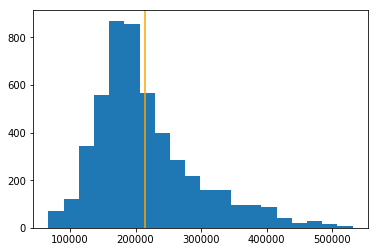

In [3450]:
plt.hist(test['Price'], bins = 20)
plt.axvline(x=data['Price'].mean(), color='orange')

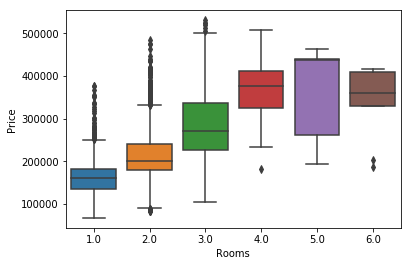

In [3451]:
sns.boxplot(x=test['Rooms'], y = test['Price']);

In [3452]:
test.loc[:, ['Id', 'Price']].to_csv('ASatyukova_predictions.csv', index=None)

In [3453]:
result = pd.read_csv('ASatyukova_predictions.csv')

In [3454]:
result.shape

(5000, 2)

In [3455]:
result.describe()

,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,215370.442769
std,4832.674037,77764.593733
min,1.000000,67053.585253
25%,4221.750000,164899.719962
50%,8320.500000,195940.180186
75%,12598.250000,249946.134592
max,16795.000000,531051.953461
